In [1]:
import pandas as pd
import shutil
import os

### DATA EXPLORATION

First, we have to explore the data in order to get an understanding of the files we have been given.

We'll start by loading the 'medata.csv' file and then use the "head" function of pandas to return the first columns of this file

In [2]:
data = pd.read_csv("metadata.csv")

In [3]:
data.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


As shown above, we have in the medata file informations about people who have been diagnotised to the COVID-19/Pneumonia/SRAS,... such as: age, survival, intubated, etc. In our case we'll focus on the COVID-19

<AxesSubplot:ylabel='finding'>

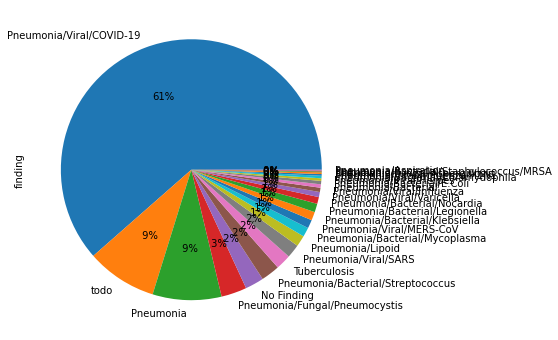

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6,))
data['finding'].value_counts(dropna=False).plot.pie(autopct='%2.0f%%')

In this metadata file we're looking for a particular kind a chest X ray's view stored in the column named "view".

<AxesSubplot:ylabel='view'>

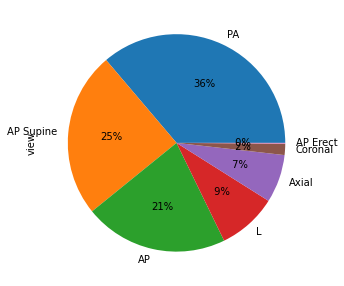

In [5]:
plt.figure(figsize=(5,5))
data['view'].value_counts(dropna=False).plot.pie(autopct='%2.0f%%')

As we can see, there's differents kind of views stored in the data['view'] column but we'll only retrieve the anteriorposterior(AP) one.

We just have now to extract the COVID-19's AP views

In [6]:
#The following code is taken from:
#[https://github.com/ieee8023/covid-chestxray-dataset/blob/master/scripts/select_covid_patient_X_ray_images.py]

In [7]:
# Selecting all combination of 'COVID-19' patients with 'AP' X-Ray view
virus = "Pneumonia/Viral/COVID-19" # Virus to look for
x_ray_view = "AP" # View of X-Ray


imageDir = "images" # Directory of images
outputDir = 'covid19_ap/' # Output directory to store selected images

if not os.path.isfile(outputDir):  # check if directory already exist
    os.mkdir(outputDir)  # create a directory


# loop over the rows of the COVID-19 data frame
for (i, row) in data.iterrows():
	if row["finding"] != virus or row["view"] != x_ray_view:
		continue

	filename = row["filename"].split(os.path.sep)[-1]
	filePath = os.path.sep.join([imageDir, filename])
	shutil.copy2(filePath, outputDir)